In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.keras.utils import load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
numbers_str = ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15"]
suffixes = ["centerlight","glasses","happy","leftlight","noglasses","normal","rightlight","sad","sleepy","surprised","wink"]
images = []
labels = []

for str1 in numbers_str :
    for str2 in suffixes :
        image = load_img ("drive/MyDrive/Dataset-Project1-CI/subject"+str1+"."+str2 )
        label = int(str1)
        labels.append(label)
        image_array = np.array(image)
        images.append(image_array.flatten())

images = np.array(images)
labels = np.array(labels)
images.shape

(165, 233280)

In [ ]:
pca = PCA (n_components = 2)

images_pca = pca.fit_transform(images)

images_pca

array([[-13287.43813006,    491.43467778],
       [ -5740.53833576,  -7679.38307464],
       [ -5308.82830698,  -7584.86809285],
       [-28376.61635638,  21769.49509344],
       [-12812.22994708,   -903.82248016],
       [ -6670.18803623,  -7022.96346113],
       [ 23051.85844017,  30776.38032709],
       [ -6431.33728146,  -7434.22949284],
       [ -7778.46059446,  -6222.89369702],
       [ -9619.95717142,  -4757.49940087],
       [ -9407.59928857,  -4815.19643958],
       [-16365.59659544,    941.15583032],
       [-17436.41471902,    307.04080618],
       [-22474.52162041,   6588.77940535],
       [-31489.08262848,  20131.03047654],
       [-21541.45968732,   5049.88540815],
       [-21541.45968732,   5049.88540815],
       [   568.42210321,  14901.17553989],
       [-21577.25545258,   4931.9957    ],
       [-21432.78551702,   4782.10728417],
       [-20450.36179905,   4353.59085448],
       [-20312.89541905,   2608.02227888],
       [ -7915.89247819,  -7124.69605855],
       [ -1

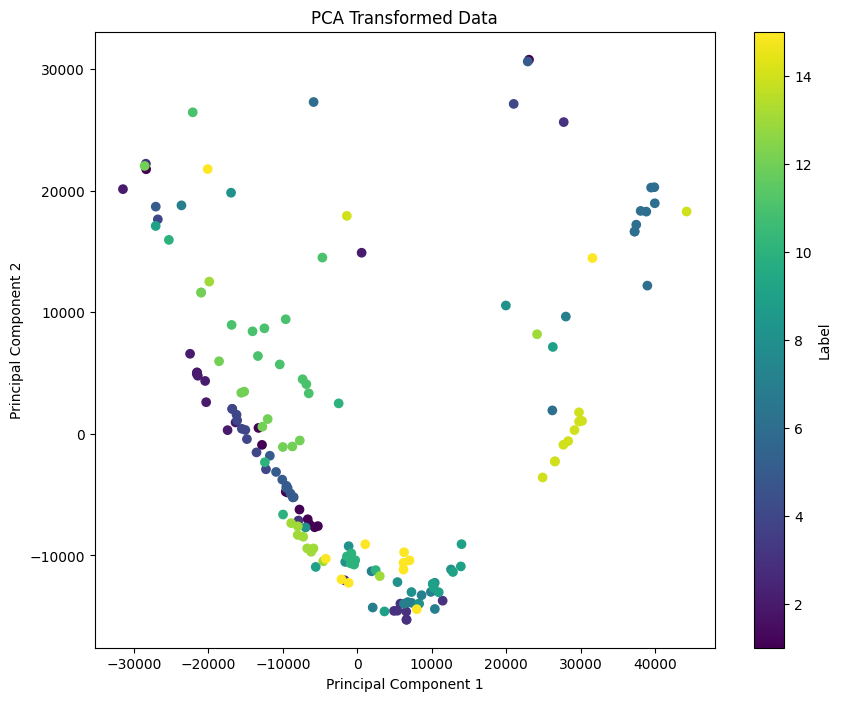

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

In [ ]:
tsne = TSNE(n_components=2)

images_tsne = tsne.fit_transform(images)

images_tsne

array([[ -0.5386707 ,   4.412306  ],
       [ -0.7509632 ,   2.359199  ],
       [ -0.52858067,   2.5645332 ],
       [-10.107454  ,  10.617488  ],
       [ -6.985253  ,   5.205204  ],
       [ -1.4177912 ,   2.5912428 ],
       [ 16.437227  ,  -1.5456202 ],
       [ -1.0130149 ,   2.5098085 ],
       [ -0.9688331 ,   3.0805972 ],
       [ -1.75403   ,   3.4122498 ],
       [ -1.0854036 ,   3.5579908 ],
       [ -6.601836  ,   6.37942   ],
       [ -4.1949873 ,   5.8866596 ],
       [ -6.265392  ,   7.398994  ],
       [ -9.686979  ,   9.011845  ],
       [ -5.6413355 ,   7.1510344 ],
       [ -5.6413355 ,   7.1510344 ],
       [ -4.7793922 ,   9.027128  ],
       [ -5.460198  ,   6.657759  ],
       [ -5.501354  ,   7.3613534 ],
       [ -4.6770344 ,   7.485615  ],
       [ -4.7193007 ,   6.39755   ],
       [  1.5040145 ,   0.39569855],
       [  1.9858841 ,  -0.37041035],
       [  7.282188  ,  -2.7544897 ],
       [-11.057491  ,  10.4270735 ],
       [  6.727956  ,  -2.879643  ],
 

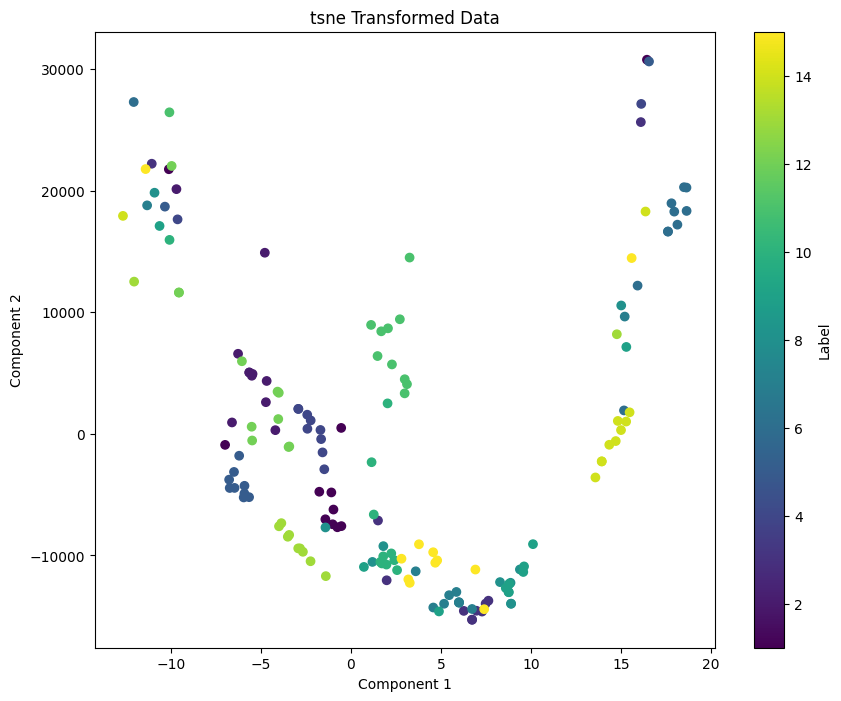

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(images_tsne[:, 0], images_pca[:, 1], c=labels, cmap='viridis')
plt.title('tsne Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label')
plt.show()

In [ ]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
images_vgg = []

for str1 in numbers_str :
    for str2 in suffixes :
        image = load_img ("drive/MyDrive/Dataset-Project1-CI/subject"+str1+"."+str2 , target_size=(224,224))
        image = np.array(image)
        image = np.expand_dims(image,axis=0)
        image = preprocess_input(image)
        images_vgg.append(image)

features = []

for image in images_vgg :
    feature = model.predict(image)
    features.append(feature.flatten())

features = np.array(features)

1/1 [==============================] - 1s 595ms/step


In [ ]:
features.shape

(165, 4096)

In [ ]:
pca = PCA (n_components = 2)

features_pca = pca.fit_transform(features)

features_pca

array([[-1.14034672e+01,  5.20516014e+00],
       [-1.28748617e+01,  8.39553356e+00],
       [-9.28568459e+00,  1.52000551e+01],
       [ 4.23106050e+00,  1.30628786e+01],
       [-7.63573503e+00,  8.69645405e+00],
       [-1.12490015e+01,  1.68497601e+01],
       [ 3.26257362e+01,  1.55112276e+01],
       [-7.56739950e+00,  1.43469543e+01],
       [-1.00438614e+01,  1.46524830e+01],
       [-5.68170261e+00,  2.05284595e+01],
       [-1.04704685e+01,  1.21083784e+01],
       [-6.50004911e+00, -5.90631819e+00],
       [ 5.81774330e+00, -2.08915634e+01],
       [ 4.53618908e+00, -1.59573097e+01],
       [ 1.82474685e+00, -9.97054100e+00],
       [ 6.81922102e+00, -1.73181362e+01],
       [ 6.81922102e+00, -1.73181362e+01],
       [ 1.95720596e+01, -6.32085228e+00],
       [ 3.21749353e+00, -1.94569283e+01],
       [ 4.81419134e+00, -1.68012085e+01],
       [ 8.52679634e+00, -7.61529541e+00],
       [ 7.09742546e+00, -1.39419508e+01],
       [-7.57411528e+00,  6.11748409e+00],
       [-8.

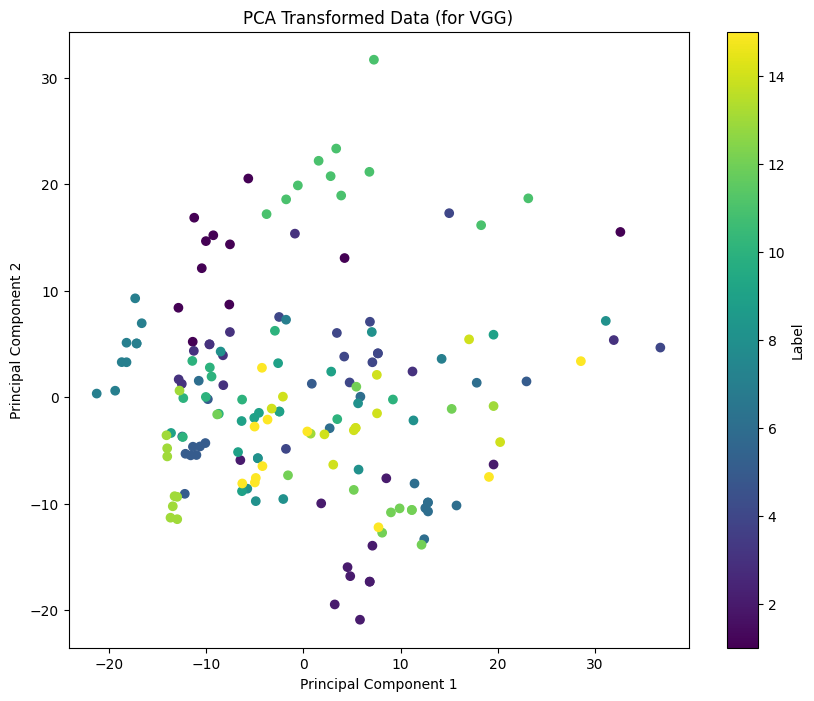

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Transformed Data (for VGG)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

In [ ]:
tsne = TSNE(n_components=2)

features_tsne = tsne.fit_transform(images)

features_tsne

array([[ -3.8728805 ,  -1.2963723 ],
       [ -1.6766627 ,  -1.7147168 ],
       [ -1.8167342 ,  -1.5187881 ],
       [-14.812114  ,  -6.597472  ],
       [ -8.015303  ,  -6.273354  ],
       [ -1.694726  ,  -2.5035577 ],
       [ 14.908832  ,  -2.823614  ],
       [ -1.6987039 ,  -2.0694354 ],
       [ -2.281182  ,  -1.9729654 ],
       [ -2.4169354 ,  -2.781912  ],
       [ -2.7610352 ,  -1.919791  ],
       [ -8.904795  ,  -5.2835155 ],
       [ -7.547215  ,  -3.1815069 ],
       [ -9.591027  ,  -4.499057  ],
       [-13.150022  ,  -6.885542  ],
       [ -9.187361  ,  -3.9723375 ],
       [ -9.187361  ,  -3.9723375 ],
       [-10.386287  ,  -2.5009825 ],
       [ -8.654461  ,  -4.092831  ],
       [ -9.284235  ,  -3.7677321 ],
       [ -8.961869  ,  -2.933135  ],
       [ -8.163959  ,  -3.461351  ],
       [ -1.4217927 ,   1.5861634 ],
       [ -0.39019567,   2.3297322 ],
       [  4.2378592 ,   5.5818367 ],
       [-14.812664  ,  -5.646872  ],
       [  3.9364128 ,   4.9998903 ],
 

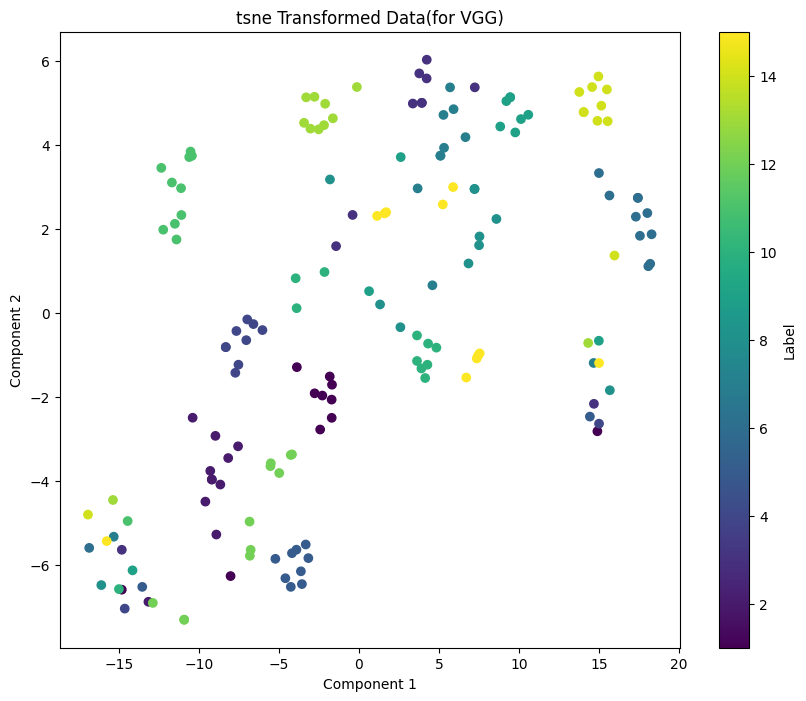

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
plt.title('tsne Transformed Data(for VGG)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label')
plt.show()

In [ ]:
type(features_tsne)

numpy.ndarray

In [ ]:
def rand_index (correct_labels,output_labels):
  if len(correct_labels) != len(output_labels):
    return -1
  length = len(correct_labels)
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range(length) :
    for j in range(length) :
      if i != j :
        if correct_labels[i] == correct_labels[j] and output_labels[i] == output_labels[j] :
          TP += 1
        elif correct_labels[i] != correct_labels[j] and output_labels[i] != output_labels[j] :
          TN += 1
        elif correct_labels[i] == correct_labels[j] and output_labels[i] != output_labels[j] :
          FN += 1
        elif correct_labels[i] != correct_labels[j] and output_labels[i] == output_labels[j] :
          FP += 1

  correct = (TP+TN)
  all = (TP + TN + FP + FN)

  return (correct/all)

In [ ]:
from sklearn.cluster import KMeans

#KMEANS on tsne dimension reduction of VGG
kmeans1 = KMeans(n_clusters=15,random_state=42)

kmeans1.fit(features_tsne)

kmeans_labels_tsne = kmeans1.labels_

#KMEANS on PCA dimension reduction of VGG

kmeans2 = KMeans(n_clusters=15,random_state=42)

kmeans2.fit(features_pca)

kmeans_labels_pca = kmeans2.labels_

print("RAND-INDEX for tsne VGG kmeans")
print (rand_index(labels,kmeans_labels_tsne))
print("RAND-INDEX for PCA VGG kmeans")
print (rand_index(labels,kmeans_labels_pca))

RAND-INDEX for tsne VGG kmeans
0.9381374722838137
RAND-INDEX for PCA VGG kmeans
0.9116038433111604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Actual Labels')

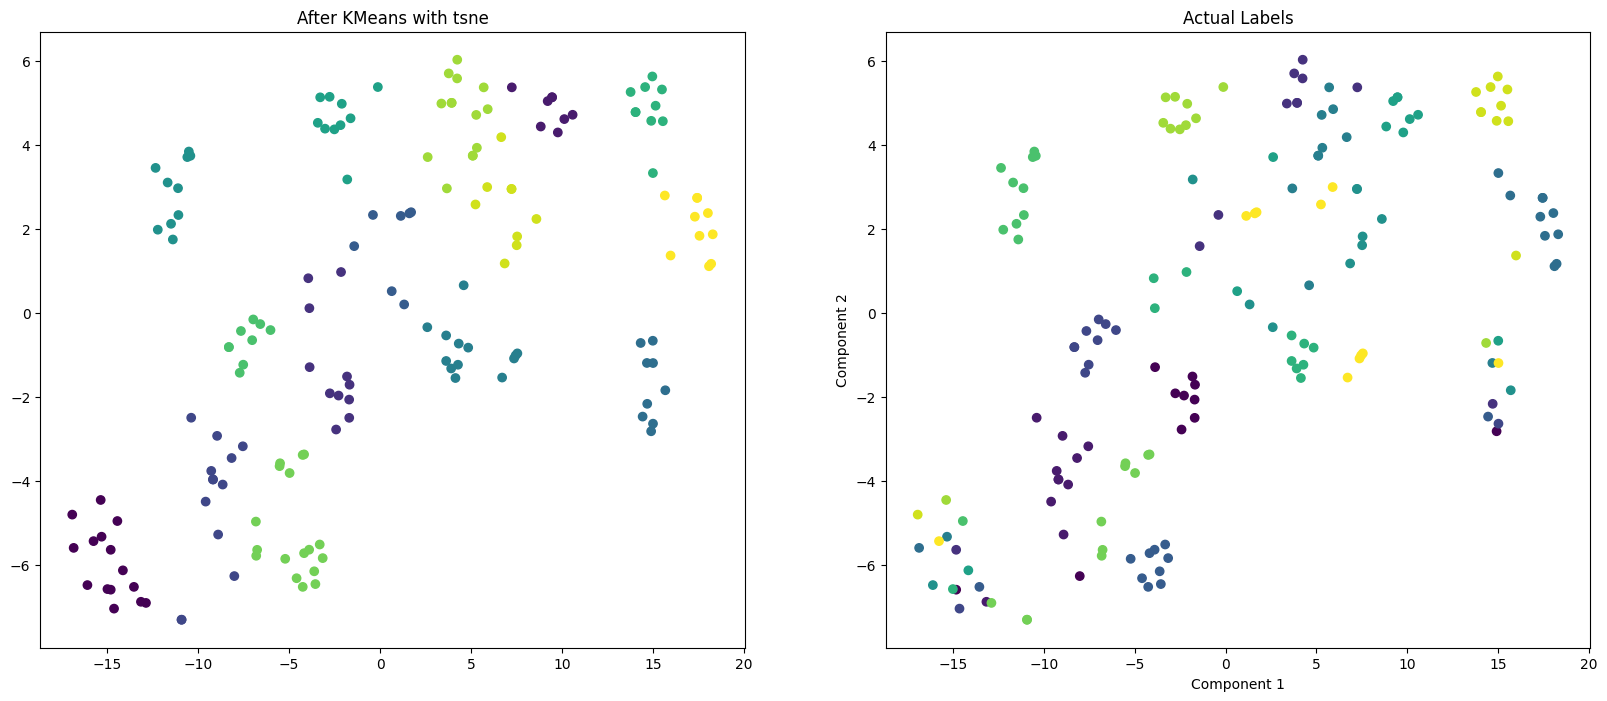

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels_tsne, cmap='viridis')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After KMeans with tsne")
ax2.set_title("Actual Labels")

Text(0.5, 1.0, 'Actual Labels')

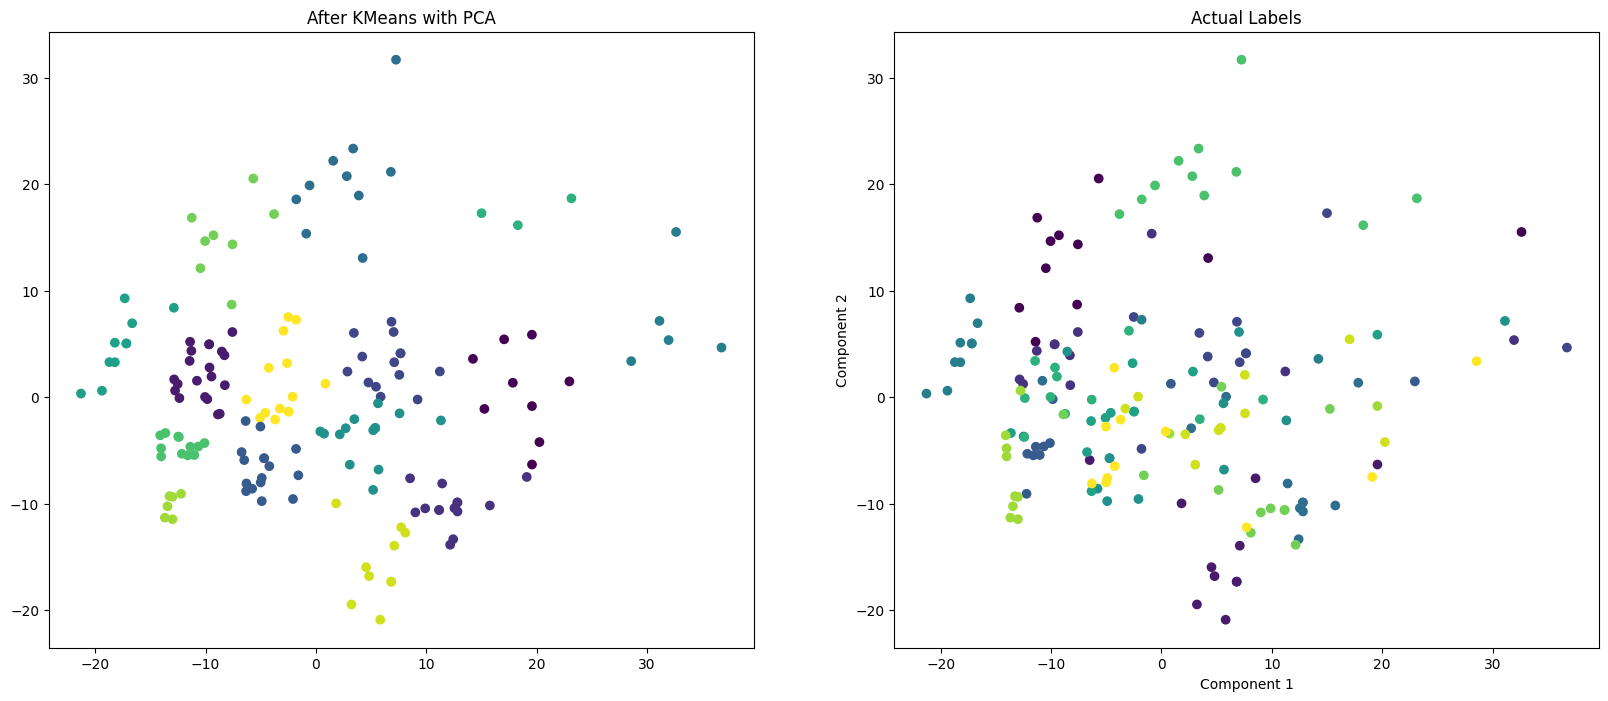

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels_pca, cmap='viridis')
ax2.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After KMeans with PCA")
ax2.set_title("Actual Labels")

In [ ]:
def number_of_clusters(output_labels):
  uniques = []
  for label in output_labels :
    if not label in uniques :
      uniques.append(label)

  return len(uniques)

In [ ]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=2).fit(features_tsne)

labels_meanshift_tsne = meanshift.labels_

print("RAND-INDEX for tsne VGG MeanShift")
print(rand_index(labels,labels_meanshift_tsne))
number_of_clusters(labels_meanshift_tsne)

RAND-INDEX for tsne VGG MeanShift
0.951810790835181


20

Text(0.5, 1.0, 'Actual Labels')

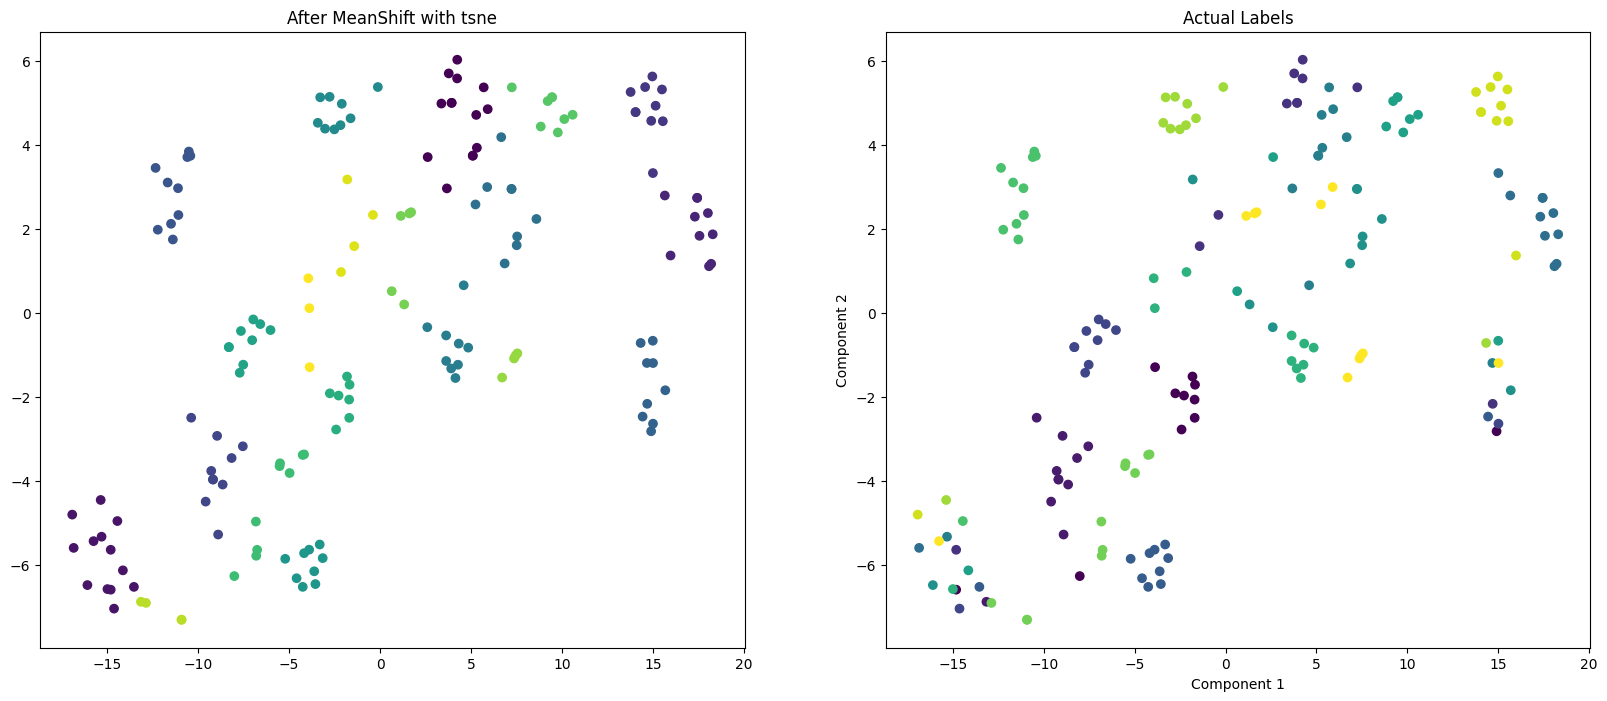

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels_meanshift_tsne, cmap='viridis')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After MeanShift with tsne")
ax2.set_title("Actual Labels")

In [ ]:
meanshift2 = MeanShift(bandwidth=2).fit(features_pca)

labels_meanshift_pca = meanshift2.labels_

print("RAND-INDEX for PCA VGG MeanShift")
print(rand_index(labels,labels_meanshift_pca))
number_of_clusters(labels_meanshift_pca)

RAND-INDEX for PCA VGG MeanShift
0.9324464153732447


74

Text(0.5, 1.0, 'Actual Labels')

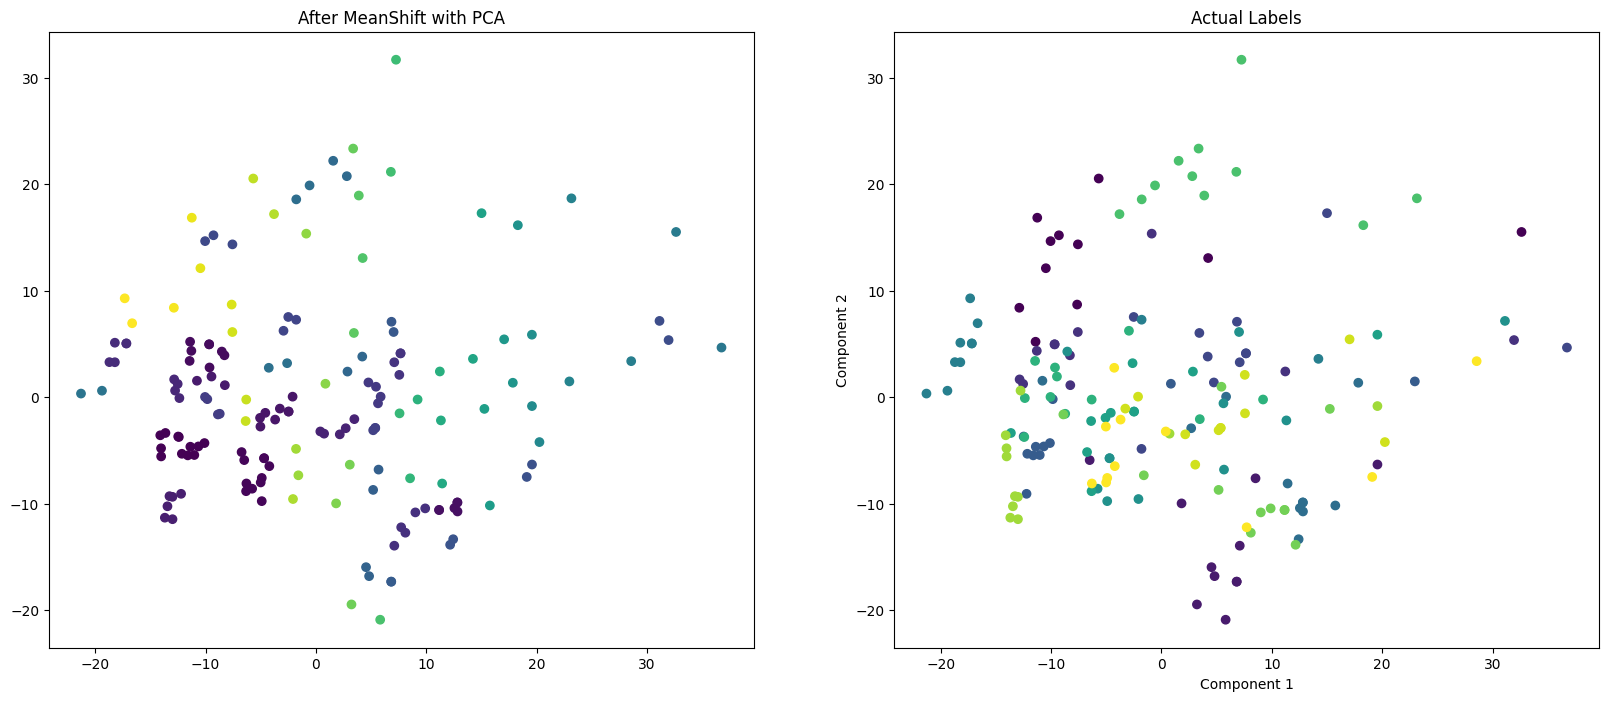

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_meanshift_pca, cmap='viridis')
ax2.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After MeanShift with PCA")
ax2.set_title("Actual Labels")

TSNE actually works better than pca in this project (according to plots).
so we only use tsne from this moment

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN (eps=1.5,min_samples=3).fit(features_tsne)

dbscan_labels_tsne = dbscan.labels_

print("RAND-INDEX for tsne VGG DBSCAN")
print(rand_index(labels,dbscan_labels_tsne))
number_of_clusters(dbscan_labels_tsne)

RAND-INDEX for tsne VGG DBSCAN
0.9352549889135255


18

Text(0.5, 1.0, 'Actual Labels')

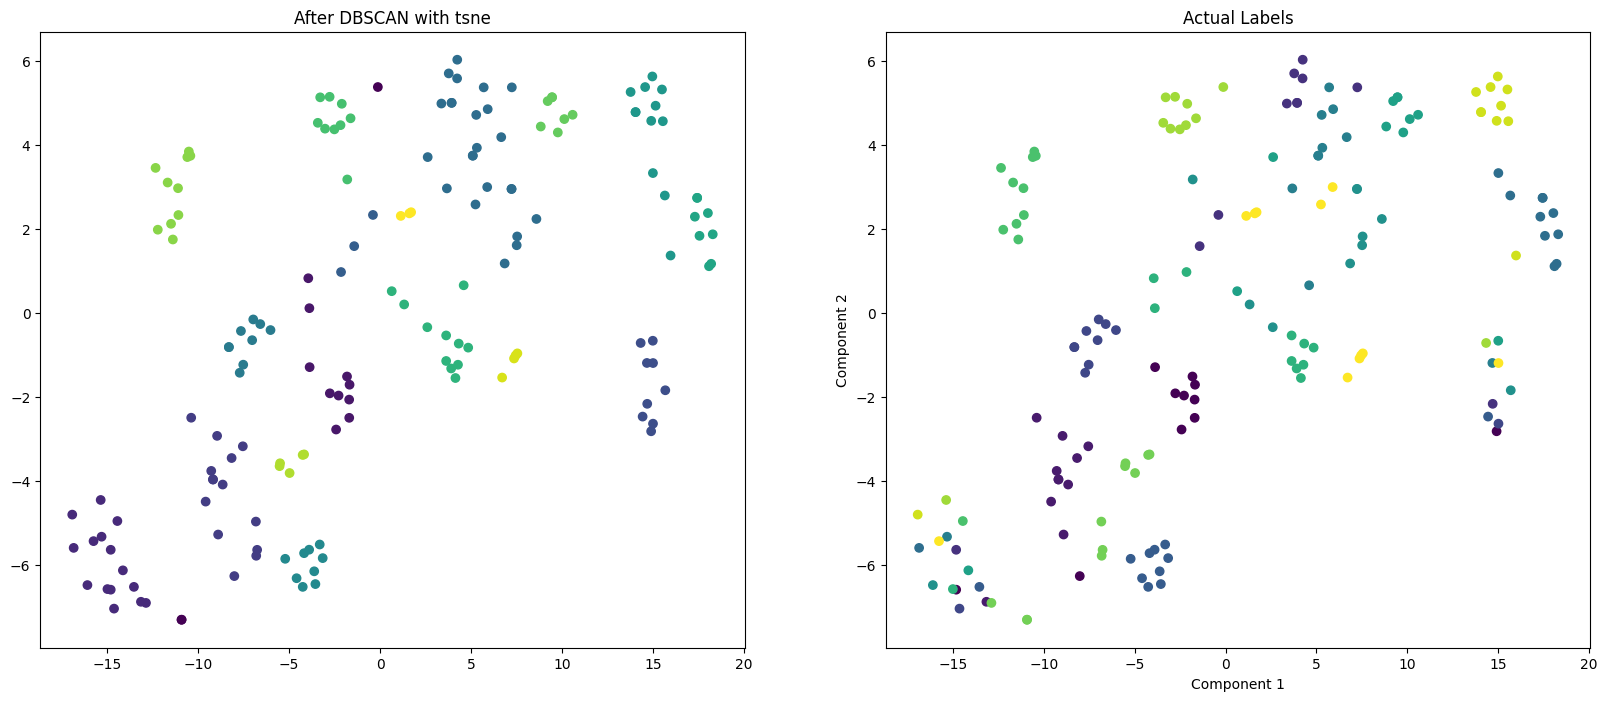

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_tsne[:, 0], features_tsne[:, 1], c=dbscan_labels_tsne, cmap='viridis')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After DBSCAN with tsne")
ax2.set_title("Actual Labels")

In [122]:
from sklearn.cluster import AgglomerativeClustering

agglomerative1 = AgglomerativeClustering(n_clusters=15,linkage="average").fit(features_tsne)

agglomerative1_labels = agglomerative1.labels_

print(rand_index(labels,agglomerative1_labels))

0.9373983739837398


Text(0.5, 1.0, 'Actual Labels')

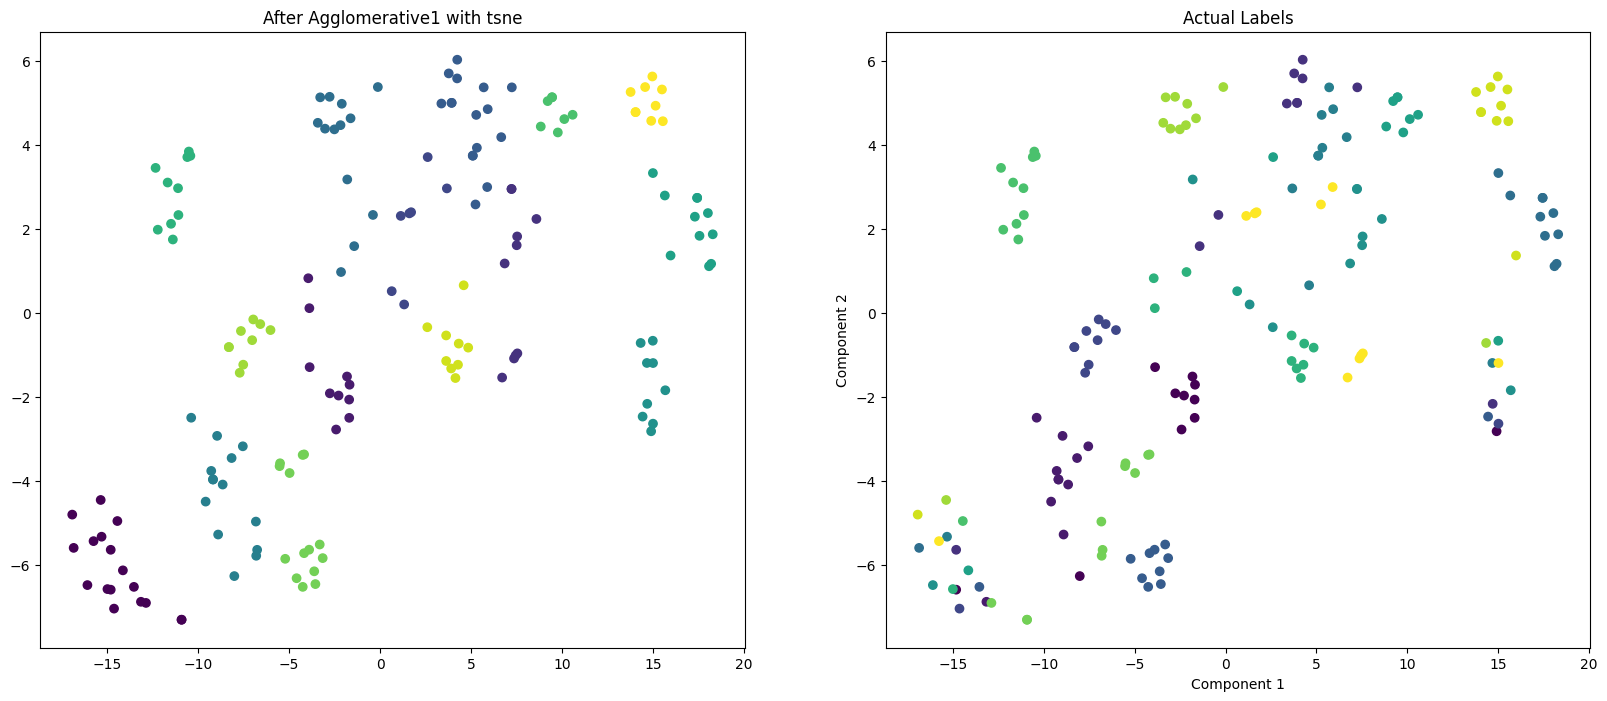

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.scatter(features_tsne[:, 0], features_tsne[:, 1], c=agglomerative1_labels, cmap='viridis')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax1.set_title("After Agglomerative1 with tsne")
ax2.set_title("Actual Labels")

In [129]:
import os
from math import floor
import shutil
os.makedirs(os.path.join("drive","MyDrive","output1"))

In [130]:
for i in range(len(labels_meanshift_tsne)) :
  mypath = os.path.join("drive","MyDrive","output1",str(labels_meanshift_tsne[i]))
  if not os.path.exists(mypath):
    os.makedirs(mypath)
  x = floor(i/11)
  y = (i%11)
  file_name = "subject"+numbers_str[x]+"."+suffixes[y]
  file_path = os.path.join("drive","MyDrive","Dataset-Project1-CI",file_name)
  file_dest = os.path.join("drive","MyDrive","output1",str(labels_meanshift_tsne[i]),file_name)
  shutil.copyfile(file_path,file_dest)

In [131]:
#os.makedirs(os.path.join("drive","MyDrive","output2"))
for i in range(len(agglomerative1_labels)) :
  mypath = os.path.join("drive","MyDrive","output2",str(agglomerative1_labels[i]))
  if not os.path.exists(mypath):
    os.makedirs(mypath)
  x = floor(i/11)
  y = (i%11)
  file_name = "subject"+numbers_str[x]+"."+suffixes[y]
  file_path = os.path.join("drive","MyDrive","Dataset-Project1-CI",file_name)
  file_dest = os.path.join("drive","MyDrive","output2",str(agglomerative1_labels[i]),file_name)
  shutil.copyfile(file_path,file_dest)